# Comparison of measurements from different libraries

In [7]:
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.measure import regionprops
from pyclesperanto_prototype import imshow
import matplotlib.pyplot as plt
from napari_simpleitk_image_processing import watershed_otsu_labeling
from napari_simpleitk_image_processing import label_statistics

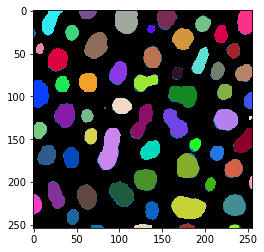

In [2]:
blobs = imread('../../data/blobs.tif')
labels = watershed_otsu_labeling(blobs)
imshow(labels, labels=True)

In [6]:
simpleitk_statistics = label_statistics(blobs, labels, None, True, True, True, True, True, True)
skimage_statistics = regionprops(labels, intensity_image=blobs)

In [12]:
simpleitk_statistics.keys()

dict_keys(['label', 'maximum', 'mean', 'median', 'minimum', 'sigma', 'sum', 'variance', 'bbox_0', 'bbox_1', 'bbox_2', 'bbox_3', 'centroid_0', 'centroid_1', 'elongation', 'feret_diameter', 'flatness', 'roundness', 'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1', 'equivalent_spherical_perimeter', 'equivalent_spherical_radius', 'number_of_pixels', 'number_of_pixels_on_border', 'perimeter', 'perimeter_on_border', 'perimeter_on_border_ratio', 'principal_axes0', 'principal_axes1', 'principal_axes2', 'principal_axes3', 'principal_moments0', 'principal_moments1'])

In [19]:
simpleitk_perimeter = np.asarray(simpleitk_statistics['feret_diameter'])

In [23]:
skimage_perimeter = np.asarray([s.feret_diameter_max for s in skimage_statistics])

## Scatter plot

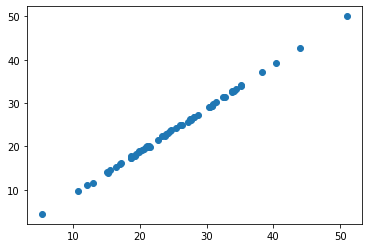

In [24]:
plt.plot(skimage_perimeter[1:], simpleitk_perimeter[1:], 'o')

## Bland-Altman plot

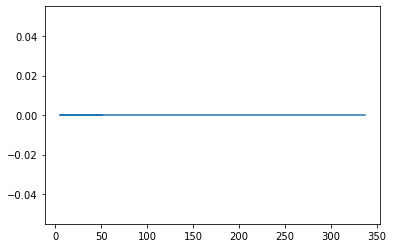

In [27]:
mean = (skimage_perimeter + skimage_perimeter) / 2
diff = skimage_perimeter - skimage_perimeter

plt.plot(mean, diff)